<a href="https://colab.research.google.com/github/aku019/Analytics-ML-DL-Learning/blob/main/digit_rec2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')


Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


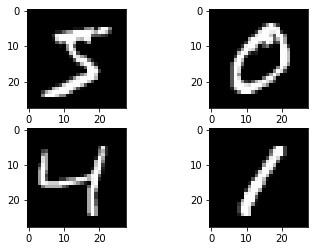

In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

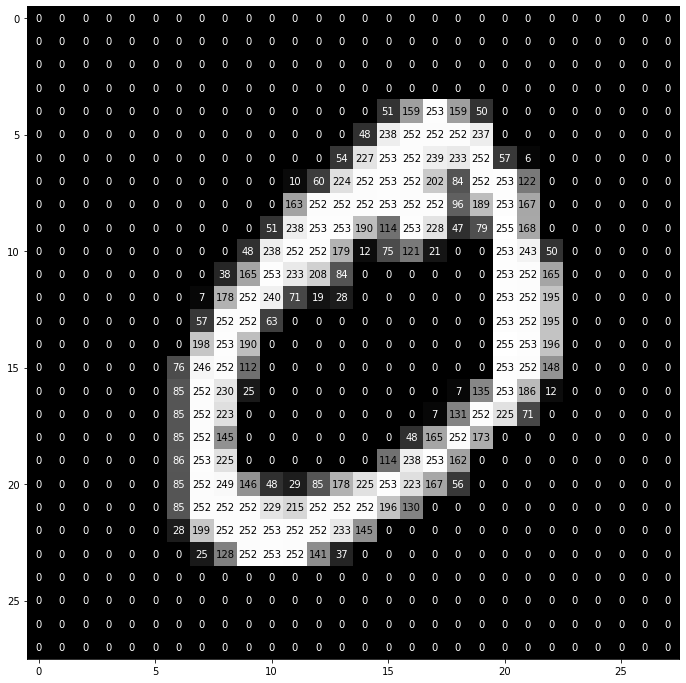

In [ ]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(X_train[1].reshape(28,28), ax)

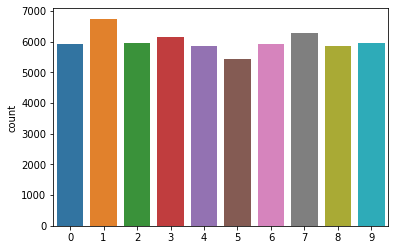

In [ ]:
import seaborn as sns

g = sns.countplot(y_train)


In [ ]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [ ]:
#flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')

In [ ]:
 X_train.shape[1]

784

In [ ]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [ ]:
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [ ]:
# build the model
model = baseline_model()
model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_56 (Dense)             (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 1s - loss: 0.2827 - accuracy: 0.9187 - val_loss: 0.1403 - val_accuracy: 0.9583
Epoch 2/10
 - 1s - loss: 0.1104 - accuracy: 0.9690 - val_loss: 0.0954 - val_accuracy: 0.9721
Epoch 3/10
 - 1s - loss: 0.0716 - accuracy: 0.9795 - val_loss: 0.0864 - val_accuracy: 0.9724
Epoch 4/10
 - 1s - loss: 0.0498 - accuracy: 0.9862 - val_loss: 0.0683 - val_accuracy: 0.9778
Epoch 5/10
 - 1s - loss: 0.0355 - accuracy: 0.9904 - val_loss: 0.0601 - val_accuracy: 0.9808
Epoch 6/10
 - 1s - loss: 0.0269 - accuracy: 0.9926 - val_loss: 0.0608 - val_accuracy: 0.9809
Epoch 7/10
 - 1s - loss: 0.0191 - accuracy: 0.9952 - val_loss: 0.0662 - val_accuracy: 0.9803
Epoch 8/10
 - 1s - loss: 0.0143 - accuracy: 0.9967 - val_loss: 0.0595 - val_accuracy: 0.9824
Epoch 9/10
 - 1s - loss: 0.0111 - accuracy: 0.9976 - val_loss: 0.0556 - val_accuracy: 0.9827
Epoch 10/10
 - 1s - loss: 0.0093 - accuracy: 0.9979 - val_loss: 0.0586 - val_accuracy: 0.9817
Baseline Error: 1.8

In [ ]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# define a simple CNN model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
	model.add(MaxPooling2D())
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [ ]:
# build the model
model_simple = baseline_model()
model_simple.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_55 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 4608)              0         
_________________________________________________________________
dense_57 (Dense)             (None, 128)               589952    
_________________________________________________________________
dense_58 (Dense)             (None, 10)                1290      
Total params: 592,074
Trainable params: 592,074
Non-trainable params: 0
_______________________________________________

In [ ]:
# Fit the model
model_simple.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

# Final evaluation of the model
scores = model_simple.evaluate(X_test, y_test, verbose=1)

print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.2613 - accuracy: 0.9247 - val_loss: 0.0868 - val_accuracy: 0.9745
Epoch 2/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.0773 - accuracy: 0.9767 - val_loss: 0.0536 - val_accuracy: 0.9830
Epoch 3/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.0538 - accuracy: 0.9835 - val_loss: 0.0483 - val_accuracy: 0.9846
Epoch 4/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.0423 - accuracy: 0.9871 - val_loss: 0.0387 - val_accuracy: 0.9875
Epoch 5/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.0346 - accuracy: 0.9892 - val_loss: 0.0376 - val_accuracy: 0.9879
Epoch 6/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.0286 - accuracy: 0.9908 - val_loss: 0.0358 - val_accuracy: 0.9884
Epoch 7/10
60000/60000 [==============================] - 2s 35us/st

In [ ]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# define the larger model
def large_model():
	# create model
	model = Sequential()
	model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
	model.add(MaxPooling2D())
	model.add(Conv2D(15, (3, 3), activation='relu'))
	model.add(MaxPooling2D())
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(50, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

# build the model
model_large = large_model()
model_large.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 5, 5, 15)          0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 375)               0         
_________________________________________________________________
dense_59 (Dense)             (None, 128)             

In [ ]:
# Fit the model
model_large.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model

scores = model_large.evaluate(X_test, y_test, verbose=1)

print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.3881 - accuracy: 0.8816 - val_loss: 0.0830 - val_accuracy: 0.9741
Epoch 2/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.0994 - accuracy: 0.9698 - val_loss: 0.0524 - val_accuracy: 0.9827
Epoch 3/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.0704 - accuracy: 0.9780 - val_loss: 0.0442 - val_accuracy: 0.9853
Epoch 4/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.0573 - accuracy: 0.9825 - val_loss: 0.0321 - val_accuracy: 0.9896
Epoch 5/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.0507 - accuracy: 0.9837 - val_loss: 0.0304 - val_accuracy: 0.9892
Epoch 6/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.0431 - accuracy: 0.9862 - val_loss: 0.0268 - val_accuracy: 0.9907
Epoch 7/10
60000/60000 [==============================] - 2s 33us/st

In [ ]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# define the larger model
def larger_model():
    # create model
    model = Sequential()
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1)))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.1))
    model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=192, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.1))
    model.add(Conv2D(filters=192, kernel_size=5, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2, padding='same'))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# build the model
model_larger = larger_model()
model_larger.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_58 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 14, 14, 128)       147584    
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 14, 14, 192)     

In [ ]:
# Fit the model
model_larger.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=17, batch_size=100)
# Final evaluation of the model

scores = model_larger.evaluate(X_test, y_test, verbose=1)

print("Larger CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/17
60000/60000 [==============================] - 27s 455us/step - loss: 0.1495 - accuracy: 0.9517 - val_loss: 0.0293 - val_accuracy: 0.9910
Epoch 2/17
60000/60000 [==============================] - 27s 455us/step - loss: 0.0373 - accuracy: 0.9888 - val_loss: 0.0292 - val_accuracy: 0.9901
Epoch 3/17
60000/60000 [==============================] - 27s 455us/step - loss: 0.0257 - accuracy: 0.9922 - val_loss: 0.0320 - val_accuracy: 0.9890
Epoch 4/17
60000/60000 [==============================] - 27s 455us/step - loss: 0.0227 - accuracy: 0.9927 - val_loss: 0.0296 - val_accuracy: 0.9904
Epoch 5/17
60000/60000 [==============================] - 27s 453us/step - loss: 0.0168 - accuracy: 0.9946 - val_loss: 0.0225 - val_accuracy: 0.9931
Epoch 6/17
60000/60000 [==============================] - 27s 453us/step - loss: 0.0153 - accuracy: 0.9951 - val_loss: 0.0296 - val_accuracy: 0.9924
Epoch 7/17
60000/60000 [==============================] 

In [ ]:
#!pip uninstall scipy

#! pip install scipy==1.1.0

In [ ]:
#from scipy.misc import imread


In [ ]:
#!unzip "/gdrive/My Drive/neural net/rd_train2.zip"

In [ ]:
#import numpy as np 
#import pandas as pd 
#test = pd.read_csv("/gdrive/My Drive/neural net/rd_test.csv") 
#sample_submission = pd.read_csv("/gdrive/My Drive/neural net/rd_ss.csv") 
#temp = [] 

#for img_name in test.filename:
#  print("start "+img_name)
#  img = imread("Images/test/"+img_name,flatten=True)
  
#  img = img.astype('float32')
#  print(img.shape)
#  temp.append(img) 
  
#  print("end "+img_name)

#test_x = np.stack(temp) 
#test_x /= 255.0 
#test_x = test_x.reshape(-1, 784).astype('float32') 



In [ ]:
test_x.shape

(21000, 784)

In [ ]:
import pandas as pd
X_test =pd.read_csv('/gdrive/My Drive/kaggle_digit/test.csv').values.astype('float32')


In [ ]:
X_test = X_test.reshape(-1, 28, 28, 1)
X_test = X_test.astype('float32')/255
testY = model_larger.predict_classes(X_test)

In [ ]:
sub = pd.read_csv('/gdrive/My Drive/kaggle_digit//sample_submission.csv') #pd.read_csv("/gdrive/My Drive/neural net/rd_ss.csv") #
sub['Label'] = testY
sub.to_csv('submission.csv',index=False)
from google.colab import files
files.download('submission.csv')